## Arima forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import os

%matplotlib inline

In [2]:
RUTA = r"C:/Users/edulo/Documents/BootCamp/Semana 1/Ejercicios/thebridgedsftsep20/Entrega_ML/archive_air_Q/csvs_per_year/"
filenames = os.listdir(RUTA)

In [3]:
def read_data(path):
    
    filenames = os.listdir(path)
    
    X = pd.DataFrame()
    
    for file in filenames:
            
            df = pd.read_csv(path + file)
            df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')
            """file_filter = df.loc[(df['station'] == 28079055) | 
                            (df['station'] == 28079027) | 
                            (df['station'] == 28079059)]
            file_filter = file_filter[['date', 'O_3', 'NO_2', 'station']]"""
            
            X = pd.concat([X, df])
           

    return X

total = read_data(RUTA)
print(total.shape)
total.info()

(3808224, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808224 entries, 0 to 69095
Data columns (total 19 columns):
 #   Column   Dtype         
---  ------   -----         
 0   date     datetime64[ns]
 1   BEN      float64       
 2   CO       float64       
 3   EBE      float64       
 4   MXY      float64       
 5   NMHC     float64       
 6   NO_2     float64       
 7   NOx      float64       
 8   OXY      float64       
 9   O_3      float64       
 10  PM10     float64       
 11  PXY      float64       
 12  SO_2     float64       
 13  TCH      float64       
 14  TOL      float64       
 15  station  int64         
 16  PM25     float64       
 17  NO       float64       
 18  CH4      float64       
dtypes: datetime64[ns](1), float64(17), int64(1)
memory usage: 581.1 MB


In [4]:
df = total.groupby(['date']).agg('mean')

In [5]:
monthly_df = df.resample('M').mean()
monthly_df.head()
monthly_df.to_csv('datos_mes_01_18.csv')

In [6]:
plt_monthly.index

NameError: name 'plt_monthly' is not defined

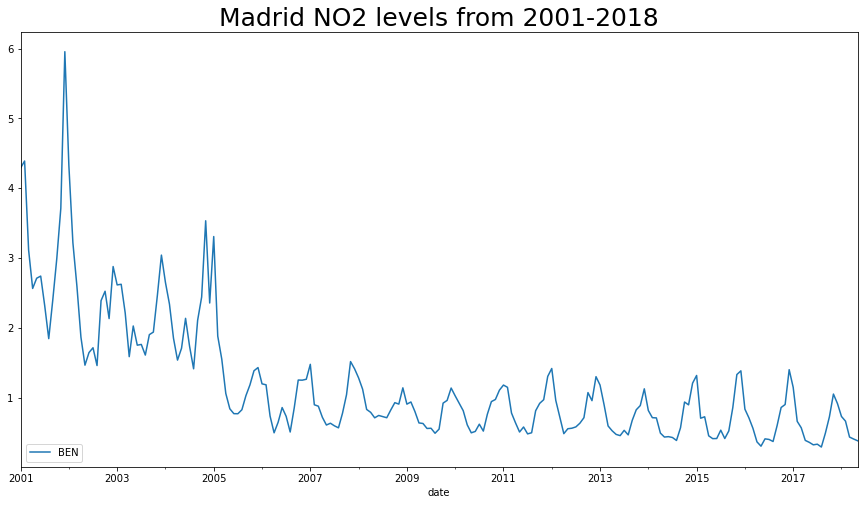

In [25]:
col_list = ['BEN']
plt_monthly = monthly_df[col_list]
plt_monthly.plot(figsize=(15, 8))
plt.title('Madrid benzeno levels from 2001-2018', fontsize=25)
plt.legend(loc='lower left')
plt.show()

In [13]:
plt_monthly
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(plt_monthly['NO_2'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition

result_add = seasonal_decompose(plt_monthly['NO_2'], model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();
#plt.show()

NameError: name 'plt_monthly' is not defined

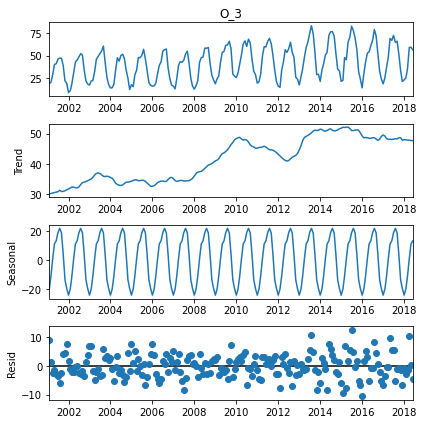

In [27]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(plt_monthly['O_3'], model = 'multiplicative', extrapolate_trend = 'freq')

# Additive Decomposition

result_add = seasonal_decompose(plt_monthly['O_3'], model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.rcParams.update({'figure.figsize': (6,6)})
result_add.plot();
#plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller, kpss


def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print('Null Hypothesis: Unit Root Present')
    print('Test Statistic < Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print (dfoutput, '\n')

In [23]:
adf_test(plt_monthly.O_3)

Results of Dickey-Fuller Test:
Null Hypothesis: Unit Root Present
Test Statistic < Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic                  -1.537133
p-value                          0.515069
#Lags Used                      15.000000
Number of Observations Used    193.000000
Critical Value 1%               -3.464694
Critical Value 5%               -2.876635
Critical Value 10%              -2.574816
dtype: float64 



In [22]:
def kpss_test(timeseries, regression='c'):
    # Whether stationary around constant 'c' or trend 'ct
    print ('Results of KPSS Test:')
    print('Null Hypothesis: Data is Stationary/Trend Stationary')
    print('Test Statistic > Critical Value => Reject Null')
    print('P-Value =< Alpha(.05) => Reject Null\n')
    kpsstest = kpss(timeseries, regression=regression)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print (kpss_output, '\n')

In [26]:
kpss_test(plt_monthly.NO_2, regression='c')

Results of KPSS Test:
Null Hypothesis: Data is Stationary/Trend Stationary
Test Statistic > Critical Value => Reject Null
P-Value =< Alpha(.05) => Reject Null

Test Statistic          1.202132
p-value                 0.010000
Lags Used              15.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64 



C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [39]:
series_NO_2 = pd.DataFrame(plt_monthly['NO_2'], index = plt_monthly.index )

series_NO_2['lag1'] = plt_monthly['NO_2'].shift(1)
series_NO_2['lag2'] = plt_monthly['NO_2'].shift(2)
series_NO_2['lag3'] = plt_monthly['NO_2'].shift(3)
series_NO_2['lag4'] = plt_monthly['NO_2'].shift(4)
series_NO_2['lag5'] = plt_monthly['NO_2'].shift(5)
series_NO_2['lag6'] = plt_monthly['NO_2'].shift(6)
series_NO_2['lag7'] = plt_monthly['NO_2'].shift(7)
series_NO_2['lag8'] = plt_monthly['NO_2'].shift(8)
series_NO_2['lag9'] = plt_monthly['NO_2'].shift(9)
series_NO_2['lag10'] = plt_monthly['NO_2'].shift(10)
series_NO_2['lag11'] = plt_monthly['NO_2'].shift(11)
series_NO_2['lag12'] = plt_monthly['NO_2'].shift(12)
series_NO_2.head()

,NO_2,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
date,,,,,,,,,,,,,
2001-01-31,57.026588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,64.654926,57.026588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-03-31,49.401208,64.654926,57.026588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-04-30,53.098803,49.401208,64.654926,57.026588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-05-31,64.109276,53.098803,49.401208,64.654926,57.026588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
series_NO_2.corr()

,NO_2,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
NO_2,1.000000,0.817515,0.679186,0.531890,0.394564,0.312242,0.279641,0.321478,0.392071,0.518380,0.666959,0.775513,0.817619
lag1,0.817515,1.000000,0.815707,0.675652,0.532615,0.395820,0.315632,0.288203,0.324751,0.389265,0.512658,0.663915,0.773226
lag2,0.679186,0.815707,1.000000,0.813881,0.676796,0.534239,0.399190,0.323627,0.290911,0.321665,0.382667,0.508498,0.660773
lag3,0.531890,0.675652,0.813881,1.000000,0.816233,0.679618,0.538889,0.408661,0.326924,0.287407,0.313561,0.376920,0.503460
lag4,0.394564,0.532615,0.676796,0.816233,1.000000,0.816269,0.680202,0.541399,0.409105,0.326330,0.286948,0.313032,0.376797
lag5,0.312242,0.395820,0.534239,0.679618,0.816269,1.000000,0.816535,0.682047,0.541590,0.409251,0.327566,0.287439,0.313844
lag6,0.279641,0.315632,0.399190,0.538889,0.680202,0.816535,1.000000,0.817223,0.681975,0.543262,0.413845,0.330431,0.290567
lag7,0.321478,0.288203,0.323627,0.408661,0.541399,0.682047,0.817223,1.000000,0.818002,0.687555,0.555060,0.421966,0.338921
lag8,0.392071,0.324751,0.290911,0.326924,0.409105,0.541590,0.681975,0.818002,1.000000,0.819970,0.693809,0.558678,0.425510
lag9,0.518380,0.389265,0.321665,0.287407,0.326330,0.409251,0.543262,0.687555,0.819970,1.000000,0.820458,0.692865,0.557009


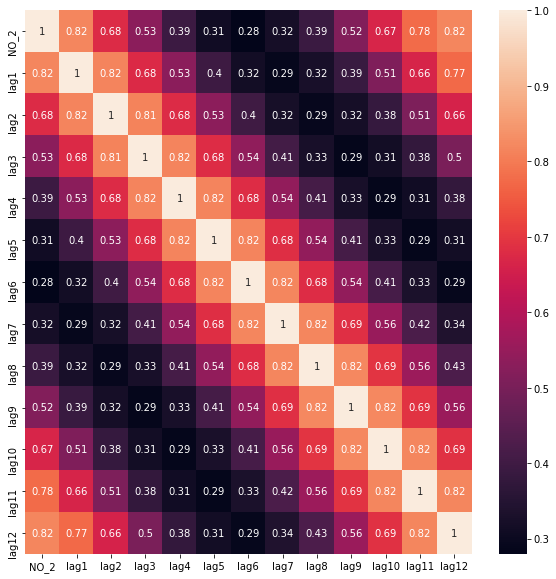

In [42]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(series_NO_2.corr(),
           annot = True);

In [43]:
plt_monthly['NO_2']

date
2001-01-31    57.026588
2001-02-28    64.654926
2001-03-31    49.401208
2001-04-30    53.098803
2001-05-31    64.109276
                ...    
2018-01-31    48.570821
2018-02-28    45.923543
2018-03-31    29.501152
2018-04-30    31.076017
2018-05-31    29.125000
Freq: M, Name: NO_2, Length: 209, dtype: float64

In [44]:
X = plt_monthly['NO_2'].values
train = X[:199]
test = X[199:]
test

array([28.00653272, 39.93180995, 53.0208672 , 62.46384612, 53.39279896,
       48.57082129, 45.92354347, 29.50115217, 31.07601651, 29.125     ])

In [46]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error



model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=30,
                    max_p=50,
                    max_q=50,
                    trace=True,
                    stepwise=True,
                  random_state=42)

print(model.aic())

predictions = model.predict(10)
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1404.912, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1405.238, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1402.912, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1402.956, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1403.280, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1404.912, Time=0.21 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1406.676, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1400.974, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1402.974, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1402.974, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1401.021, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1404.974, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.677 seconds
1400.97420553997
mean_squared_error: 223.50331322558304
root_mean_squared_error: 14.950027198155295


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


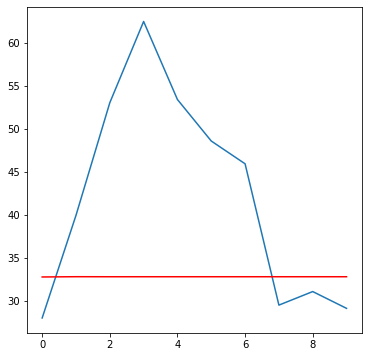

In [47]:
plt.plot(test)
plt.plot(predictions,color='red');

In [49]:
model = auto_arima(train,
                    start_p=1,
                    start_q=1,
                    max_d=3,
                    max_p=5,
                    max_q=5,
                    m = 12,
                    trace=True,
                    stepwise=True,
                  random_state=42,
                  sesionality = True)

print(model.aic())

predictions = model.predict(10)
print("mean_squared_error:", mean_squared_error(test, predictions))
print("root_mean_squared_error:", np.sqrt(mean_squared_error(test, predictions)))

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1306.784, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1405.238, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1374.874, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1389.035, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1403.280, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=1304.524, Time=2.01 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1311.547, Time=1.35 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=1306.329, Time=4.15 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=1305.820, Time=2.75 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1313.469, Time=1.33 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1336.578, Time=1.55 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=1306.484, Time=3.18 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=1306.488, Time=3.90 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1356.403, Time=0.96 sec
 ARIMA(0,1,2)(2,0,1)[12] intercept   : AIC=1306.183, Time=1.60 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=1328.897, Time=1.72 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1308.301, Time=4.66 sec
 ARIMA(1,1,1)(2,0,1)[12]             : AIC=1302.543, Time=1.50 sec
 ARIMA(1,1,1)(1,0,1)[12]             : AIC=1304.846, Time=0.58 sec
 ARIMA(1,1,1)(2,0,0)[12]             : AIC=1309.906, Time=0.76 sec
 ARIMA(1,1,1)(2,0,2)[12]             : AIC=1304.352, Time=2.09 sec
 ARIMA(1,1,1)(1,0,0)[12]             : AIC=1347.160, Time=0.34 sec
 ARIMA(1,1,1)(1,0,2)[12]             : AIC=1303.836, Time=2.03 sec
 ARIMA(0,1,1)(2,0,1)[12]             : AIC=1311.469, Time=0.98 sec
 ARIMA(1,1,0)(2,0,1)[12]             : AIC=1334.578, Time=0.99 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,1)(2,0,1)[12]             : AIC=1304.505, Time=1.47 sec
 ARIMA(1,1,2)(2,0,1)[12]             : AIC=1304.509, Time=2.20 sec
 ARIMA(0,1,0)(2,0,1)[12]             : AIC=1354.403, Time=0.67 sec
 ARIMA(0,1,2)(2,0,1)[12]             : AIC=1304.188, Time=1.18 sec
 ARIMA(2,1,0)(2,0,1)[12]             : AIC=1326.898, Time=1.37 sec


C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\edulo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,1)[12]             : AIC=1306.322, Time=2.87 sec

Best model:  ARIMA(1,1,1)(2,0,1)[12]          
Total fit time: 52.819 seconds
1302.5429871200308
mean_squared_error: 44.10838460051333
root_mean_squared_error: 6.6414143524187175


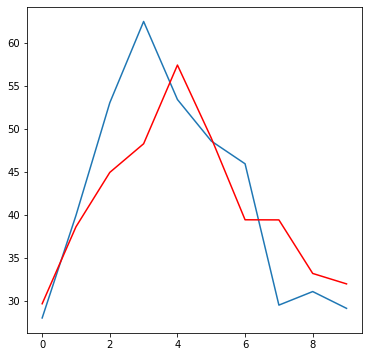

In [50]:
plt.plot(test)
plt.plot(predictions,color='red');